# Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load and Preprocessing data

In [17]:
glass_df = pd.read_csv("C:/ML/Labwork3/dataset/KNN/glass.csv")
glass_df.columns = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'GlassType']
glass_df = glass_df.drop(columns = 'Id')

x = glass_df.drop(columns = 'GlassType')
y = glass_df['GlassType']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

# K-NN with k=3

In [18]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
error_k3 = 1 - accuracy_score(y_test, y_pred)

print(f"Classification Error (k = 3): {error_k3:.3f}")

Classification Error (k = 3): 0.375


# Varying k

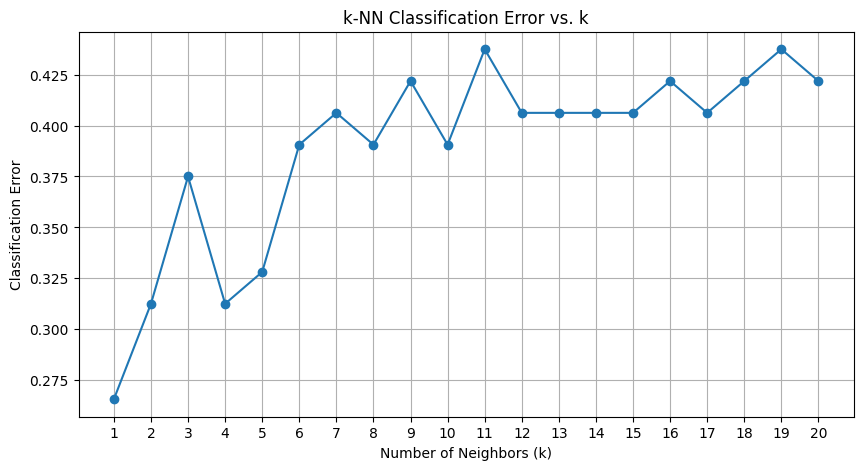

In [19]:
k_values = range(1, 21)
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    errors.append(1 - accuracy_score(y_test, y_pred))

plt.figure(figsize=(10, 5))
plt.plot(k_values, errors, marker='o')
plt.title('k-NN Classification Error vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Classification Error')
plt.xticks(k_values)
plt.grid(True)
plt.savefig("C:/ML/Labwork3/visualizations/KNN/glass_knn_error_vs_k.png")
plt.show()

# Normalize data and compare performance

In [20]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_norm, y_train)
y_pred_norm = knn.predict(x_test_norm)
error_norm = 1 - accuracy_score(y_test, y_pred_norm)
print(f"Classification Error with Normalized Data (k = 3): {error_norm:.3f}")

Classification Error with Normalized Data (k = 3): 0.328


# PCA and SVD

In [21]:
# PCA
pca = PCA(n_components = 2)
x_train_pca = pca.fit_transform(x_train_norm)
x_test_pca = pca.transform(x_test_norm)

knn.fit(x_train_pca, y_train)
y_pred_pca = knn.predict(x_test_pca)
error_pca = 1 - accuracy_score(y_test, y_pred_pca)
print(f"Classification Error with PCA (2 components): {error_pca:.3f}")

# SVD
svd = TruncatedSVD(n_components=2)
X_train_svd = svd.fit_transform(x_train_norm)
X_test_svd = svd.transform(x_test_norm)

knn.fit(X_train_svd, y_train)
y_pred_svd = knn.predict(X_test_svd)
error_svd = 1 - accuracy_score(y_test, y_pred_svd)
print(f"Classification Error with SVD (2 components): {error_svd:.3f}")

Classification Error with PCA (2 components): 0.391
Classification Error with SVD (2 components): 0.391


# K-folds Cross-Validation

In [22]:
knn_cv = KNeighborsClassifier(n_neighbors = 3)
scores = cross_val_score(knn_cv, scaler.fit_transform(x), y, cv = 5, scoring = 'accuracy')
print(f"Average classification error with 5-folds CV: {1 - np.mean(scores):.3f}")

Average classification error with 5-folds CV: 0.347


# Leave-One-Out Cross-Validation

In [23]:
loo = LeaveOneOut()
knn_loo = KNeighborsClassifier(n_neighbors = 3)
scores_loo = cross_val_score(knn_loo, scaler.fit_transform(x), y, cv = loo)
print(f"Leave-One-Out classification error: {1 - np.mean(scores_loo):.3f}")

Leave-One-Out classification error: 0.277
